In [22]:
import sqlite3
import os
import polars as pl
import plot
import matplotlib.pyplot as plt
import numpy as np

## Connect + Read from Database

### Set connection parameters

In [80]:
db_dir = "/scratch/aneeshr/concurrent-quit/results/db"
db_name = "recent_db"
db_path = db_dir + "/" + db_name

In [81]:
connection = sqlite3.connect(db_path)

### Set the date/timestamp to read

In [82]:
date_to_read = "2025-05-12"

In [83]:
read_index_bench_query = f"SELECT * from index_bench where timestamp > {date_to_read};"

### Read the data

In [84]:
df = pl.read_database(
    query = read_index_bench_query, 
    connection = connection)

### Sample Read Data

In [85]:
filter_col = "index_type"
filter_predicate = "concurrent_simple"

In [86]:
sample_filtered_result = df.filter(pl.col(filter_col) == filter_predicate)

In [87]:
sample_filtered_result

id,timestamp,index_type,workload_file,N,K,L,threads,preload_time,raw_writes_time,raw_reads_time,mixed_time,updates_time,short_range_time,mid_range_time,long_range_time,size,height,internal,leaves,fast_inserts,redistribute,soft_resets,hard_resets,fast_inserts_fail,sort
i64,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
1,"""2025-05-13 01:27:19.305222+00:…","""concurrent_simple""","""5_0_0""",5,0,0,1,1543836573,0,0,0,101350972,0,0,0,5000000,2,76,19607,0,0,0,0,0,0
2,"""2025-05-13 01:27:23.463940+00:…","""concurrent_simple""","""5_5_100""",5,5,100,1,1715764086,0,0,0,108882350,0,0,0,5000000,2,73,18795,0,0,0,0,0,0
3,"""2025-05-13 01:27:28.406659+00:…","""concurrent_simple""","""5_50_100""",5,50,100,1,2056557537,0,0,0,152885457,0,0,0,5000000,2,47,14660,0,0,0,0,0,0
4,"""2025-05-13 01:27:38.712717+00:…","""concurrent_simple""","""5_0_0""",5,0,0,2,1530777115,0,0,0,89508053,0,0,0,5000000,2,76,19607,0,0,0,0,0,0
5,"""2025-05-13 01:27:42.799056+00:…","""concurrent_simple""","""5_5_100""",5,5,100,2,1659230568,0,0,0,93317833,0,0,0,5000000,2,73,18795,0,0,0,0,0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
8,"""2025-05-13 01:28:13.395773+00:…","""concurrent_simple""","""5_5_100""",5,5,100,4,2553601996,0,0,0,148089409,0,0,0,5000000,2,73,18795,0,0,0,0,0,0
9,"""2025-05-13 01:28:18.366353+00:…","""concurrent_simple""","""5_50_100""",5,50,100,4,2322694727,0,0,0,124391544,0,0,0,5000000,2,47,14650,0,0,0,0,0,0
10,"""2025-05-13 01:28:31.784899+00:…","""concurrent_simple""","""5_0_0""",5,0,0,8,2353752242,0,0,0,179274771,0,0,0,5000000,2,76,19607,0,0,0,0,0,0


## Analysis

### Preload times

In [88]:
preload_df = df.select(
                pl.col("index_type"), 
                pl.col("K"),
                pl.col("threads"),
                pl.col("preload_time")
)

In [89]:
num_ops = 5e6
div_factor = num_ops * 1000
preload_df = preload_df.with_columns((div_factor/pl.col("preload_time")).alias("throughput"))
preload_df

index_type,K,threads,preload_time,throughput
str,i64,i64,i64,f64
"""concurrent_simple""",0,1,1543836573,3.238685
"""concurrent_simple""",5,1,1715764086,2.914154
"""concurrent_simple""",50,1,2056557537,2.431247
"""concurrent_simple""",0,2,1530777115,3.266315
"""concurrent_simple""",5,2,1659230568,3.013445
…,…,…,…,…
"""concurrent_quit""",5,8,3811350472,1.311871
"""concurrent_quit""",50,8,3451342536,1.448712
"""concurrent_quit_appends""",0,8,2218828562,2.253441


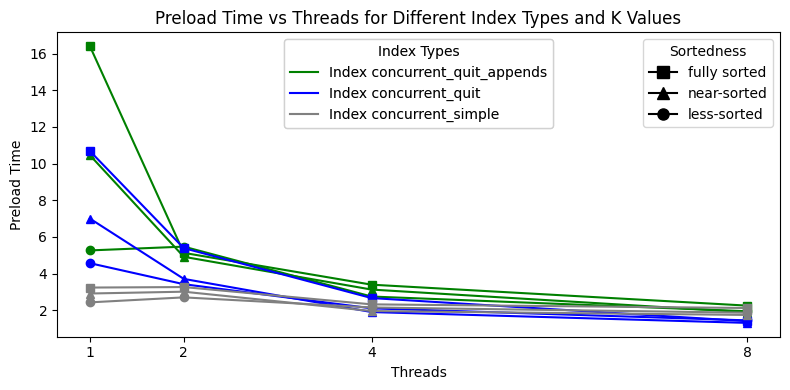

In [101]:
index_types = preload_df["index_type"].unique().to_list()
k_values = sorted(preload_df["K"].unique().to_list())
thread_values = sorted(preload_df["threads"].unique().to_list())

colors = {"concurrent_simple": "grey", "concurrent_quit": "blue", "concurrent_quit_appends": "green"}
markers = {k: ['s', '^', 'o'][i % 3] for i, k in enumerate(k_values)}
sortedness_values = {0: "fully sorted", 5: "near-sorted", 50: "less-sorted"}

plt.figure(figsize=(8, 4))
lines = []
labels = []
for index in index_types:
    # Filter DataFrame by the current index type
    index_df = preload_df.filter(pl.col("index_type") == index).sort(["K", "threads"])
    # Iterate through each K value
    for k in k_values:
        # Filter DataFrame by the current K value
        k_df = index_df.filter(pl.col("K") == k).sort("threads")
        # Plot preload time against threads for this specific index type and K
        line, =plt.plot(k_df["threads"], k_df["throughput"],
                 label=f'K={k}',
                 color=colors[index],
                 marker=markers[k],
                 linestyle='-')
        lines.append(line)
        labels.append(f'{sortedness_values[k]}')

# Set x-axis ticks and label
plt.xticks(thread_values)
plt.xlabel("Threads")
# Set y-axis label
plt.ylabel("Preload Time")
# Set plot title
plt.title("Preload Time vs Threads for Different Index Types and K Values")
# Add legend

# legend_k_handles = [plt.plot([], [], marker=markers[k], linestyle='-', color='gray', label=f'K={k}')[0] for k in k_values]
# plt.legend(handles=legend_k_handles, title='K Values', loc='upper right')

# # Create a separate legend for Index Types using proxy artists
# legend_index_handles = [plt.plot([], [], color=colors[index], label=f'{index}')[0] for index in index_types]
# plt.legend(handles=legend_index_handles, loc='upper right')

# Create a separate legend for K values (proxy artists)
marker_handles = [plt.Line2D([0], [0], marker=markers[k], color='k', linestyle='-', markersize=8, label=f'{sortedness_values[k]}') for k in k_values]
legend2 = plt.legend(handles=marker_handles, title='Sortedness', loc='upper right')
plt.gca().add_artist(legend2) # Add the second legend to the current axes

# Create a separate legend for Index Types (proxy artists)
color_handles = [plt.Line2D([0], [0], color=colors[index], linestyle='-', label=f'Index {index}') for index in index_types]
legend3 = plt.legend(handles=color_handles, title='Index Types', loc='upper center')
plt.gca().add_artist(legend3) # Add the third legend to the current axes

# Adjust layout to prevent labels from overlapping
plt.tight_layout()
# Show the plot
plt.show()

# Old

In [20]:
# fetch index types
index_types = df["index_type"].unique().to_list()

# filter and group dfs by index types
grouped_dfs = {}
for index in index_types:
    filtered_df = preload_df.filter(pl.col("index_type") == index).sort("K")
    grouped_dfs[index] = filtered_df

k_values = sorted(preload_df["K"].unique().to_list())

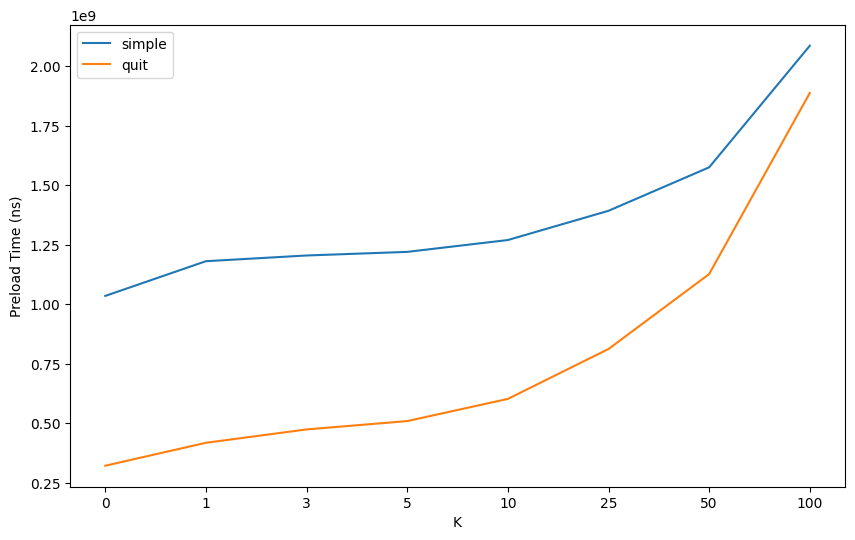

In [21]:
x_positions = np.arange(len(k_values))

plt.figure(figsize=(10,6))

for index, index_df in grouped_dfs.items():
    plt.plot(x_positions, index_df["preload_time"], label=index)

plt.xticks(x_positions, k_values)
plt.xlabel("K")
plt.ylabel("Preload Time (ns)")
plt.legend()
plt.show()